<a href="https://colab.research.google.com/github/alexmal2804/hwds/blob/master/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%91%D0%BE%D0%BB%D1%8C%D1%88%D0%BE%D0%B5_%D0%94%D0%97_2_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://colab.research.google.com/drive/1DT_wHsOol2C-iyH0GsO3A6xBrfFRQfqY?usp=sharing

<h2 style="text-align: center;"><b>Большое домашнее задание 2. Участие в соревнованиях на Kaggle. Работа с нерепрезентативными данными.
</b></h2>

ДЗ в колабе: https://colab.research.google.com/drive/18Hi97eESCrXYht-7SIoj_19pwcZhl17Y?usp=sharing

В этом домашнем задании нам нужно применить в реальном соревновании накопленные знания по машинному обучению и анализу данных!

- Нужно будет провести предобработку [данных с Kaggle](https://www.kaggle.com/sid321axn/thoraric-surgery). Затем нужно будет предсказать колонку DGN (диагноз). Это задача классификации. 
- Описание датасета (что значит признаки): https://archive.ics.uci.edu/ml/datasets/Thoracic+Surgery+Data 
- Не забудьте провести анализ данных перед тем, как применять ML-модели! Вам нужно сначала понять, с чем Вы имеете дело, поискать зависимости в данных, понять природу этих зависимостей, и только после этого уже подбирать алгоритмы. Данные с подвохом! Внимательно смотрите на распределения признаков в каждом из классов!
- В качестве основы можно использовать наработки с занятий. Необходимо попробовать сделать аугментацию данных, т.к. данных очень мало, для обучения содержательных моделей их не хватит.
- Попробуйте kNN, логистическую регрессию, SVM. Поэкспериментируйте с добавлением композитных признаков (например, полиномиальных), выбором ядра (для SVM). Подберите гиперпараметры по кросс-валидации (GridSearchCV или RandomSearchCV, второй вариант предпочтительнее).  
- Достичь идеального качества Вам не удастся, да и гнаться за этим не стоит. Гораздо важнее провести вдумчивый анализ и показать, что Вы разобрались в теме.

**Правила:**

- **Дедлайн один:** 29 января 23:59. Решения, отправленные позже, проверяться не будут, кроме случаев наличия уважительной причины.



Решения, размещенные на каких-либо интернет-ресурсах, не принимаются.
 При написании кода придерживайтесь `pep8` и используйте `type hints`.

**После жесткого дедлайна задания не принимаются. Так как дальше будет работа только над проектом**

In [117]:
# Импорт необходимых для работы модулей
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression as LR
from sklearn.feature_extraction import DictVectorizer as DV
from sklearn.model_selection import train_test_split
import matplotlib
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

##Импортируем DataSet и проведем его предварительный анализ

In [118]:
 # Импортируем в DataFrame
 df = pd.read_csv('/content/sample_data/ThoraricSurgery.csv')

In [119]:
df.head()

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,1,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,2,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,3,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,4,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,5,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T


In [120]:
# Определим размер DataFrame
df.shape

(470, 18)

In [121]:
# Проверим на пропуски в данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       470 non-null    int64  
 1   DGN      470 non-null    object 
 2   PRE4     470 non-null    float64
 3   PRE5     470 non-null    float64
 4   PRE6     470 non-null    object 
 5   PRE7     470 non-null    object 
 6   PRE8     470 non-null    object 
 7   PRE9     470 non-null    object 
 8   PRE10    470 non-null    object 
 9   PRE11    470 non-null    object 
 10  PRE14    470 non-null    object 
 11  PRE17    470 non-null    object 
 12  PRE19    470 non-null    object 
 13  PRE25    470 non-null    object 
 14  PRE30    470 non-null    object 
 15  PRE32    470 non-null    object 
 16  AGE      470 non-null    int64  
 17  Risk1Yr  470 non-null    object 
dtypes: float64(2), int64(2), object(14)
memory usage: 66.2+ KB


Пропусков нет

In [122]:
# Выведем описательную статистику
df.describe()

,id,PRE4,PRE5,AGE
count,470.000000,470.000000,470.000000,470.000000
mean,235.500000,3.281638,4.568702,62.534043
std,135.821574,0.871395,11.767857,8.706902
min,1.000000,1.440000,0.960000,21.000000
25%,118.250000,2.600000,1.960000,57.000000
50%,235.500000,3.160000,2.400000,62.000000
75%,352.750000,3.807500,3.080000,69.000000
max,470.000000,6.300000,86.300000,87.000000


##Осуществим предобработку данных

Преобразуем категориальные признаки в числовые

In [123]:
# Подключаем класс для предобработки данных
from sklearn import preprocessing

# Используем функцию, которая принимает на вход DataFrame, кодирует числовыми значениями категориальные признаки
# и возвращает обновленный DataFrame и сами кодировщики.
def number_encode_features(input_df):
    result = input_df.copy() # копируем нашу исходную таблицу
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object: # np.object -- строковый тип / если тип столбца - строка, то нужно его закодировать
            encoders[column] = preprocessing.LabelEncoder() # для колонки column создаем кодировщик
            result[column] = encoders[column].fit_transform(result[column]) # применяем кодировщик к столбцу и перезаписываем столбец
    return result, encoders

In [124]:
# Применим функцию кодирования для исследуемого датасета
df_encoded, encoders = number_encode_features(df) # Теперь encoded data содержит закодированные кат. признаки 
df_encoded.head() 

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,1,1,2.88,2.16,1,0,0,0,1,1,3,0,0,0,1,0,60,0
1,2,2,3.40,1.88,0,0,0,0,0,0,1,0,0,0,1,0,51,0
2,3,2,2.76,2.08,1,0,0,0,1,0,0,0,0,0,1,0,59,0
3,4,2,3.68,3.04,0,0,0,0,0,0,0,0,0,0,0,0,54,0
4,5,2,2.44,0.96,2,0,1,0,1,1,0,0,0,0,1,0,73,1


In [125]:
encoders

{'DGN': LabelEncoder(),
 'PRE10': LabelEncoder(),
 'PRE11': LabelEncoder(),
 'PRE14': LabelEncoder(),
 'PRE17': LabelEncoder(),
 'PRE19': LabelEncoder(),
 'PRE25': LabelEncoder(),
 'PRE30': LabelEncoder(),
 'PRE32': LabelEncoder(),
 'PRE6': LabelEncoder(),
 'PRE7': LabelEncoder(),
 'PRE8': LabelEncoder(),
 'PRE9': LabelEncoder(),
 'Risk1Yr': LabelEncoder()}

In [126]:
# Выведем соответствие числовых данных закодированным
for column in df.columns:
  if df.dtypes[column] == np.object:
    nunique = sorted(pd.unique(df_encoded[column]).tolist())
    print(f'{column} - {encoders[column].inverse_transform(nunique)} - {encoders[column].fit_transform(nunique)}')
    print(nunique)

DGN - ['DGN1' 'DGN2' 'DGN3' 'DGN4' 'DGN5' 'DGN6' 'DGN8'] - [0 1 2 3 4 5 6]
[0, 1, 2, 3, 4, 5, 6]
PRE6 - ['PRZ0' 'PRZ1' 'PRZ2'] - [0 1 2]
[0, 1, 2]
PRE7 - ['F' 'T'] - [0 1]
[0, 1]
PRE8 - ['F' 'T'] - [0 1]
[0, 1]
PRE9 - ['F' 'T'] - [0 1]
[0, 1]
PRE10 - ['F' 'T'] - [0 1]
[0, 1]
PRE11 - ['F' 'T'] - [0 1]
[0, 1]
PRE14 - ['OC11' 'OC12' 'OC13' 'OC14'] - [0 1 2 3]
[0, 1, 2, 3]
PRE17 - ['F' 'T'] - [0 1]
[0, 1]
PRE19 - ['F' 'T'] - [0 1]
[0, 1]
PRE25 - ['F' 'T'] - [0 1]
[0, 1]
PRE30 - ['F' 'T'] - [0 1]
[0, 1]
PRE32 - ['F' 'T'] - [0 1]
[0, 1]
Risk1Yr - ['F' 'T'] - [0 1]
[0, 1]


Построим распределение величин по признакам для всего DataSet

In [146]:
# График распределения величин по признакам
def ditstrib_features(input_df, cols=5):
  fig = plt.figure(figsize=(30,10))
  rows = np.ceil(float(input_df.shape[1]) / cols)
  for i, column in enumerate(input_df.columns):
      ax = fig.add_subplot(rows, cols, i + 1)
      ax.set_title(column)
      df_encoded[column].hist(axes=ax)
      plt.xticks(rotation="vertical")
  plt.subplots_adjust(hspace=0.5, wspace=0.2)

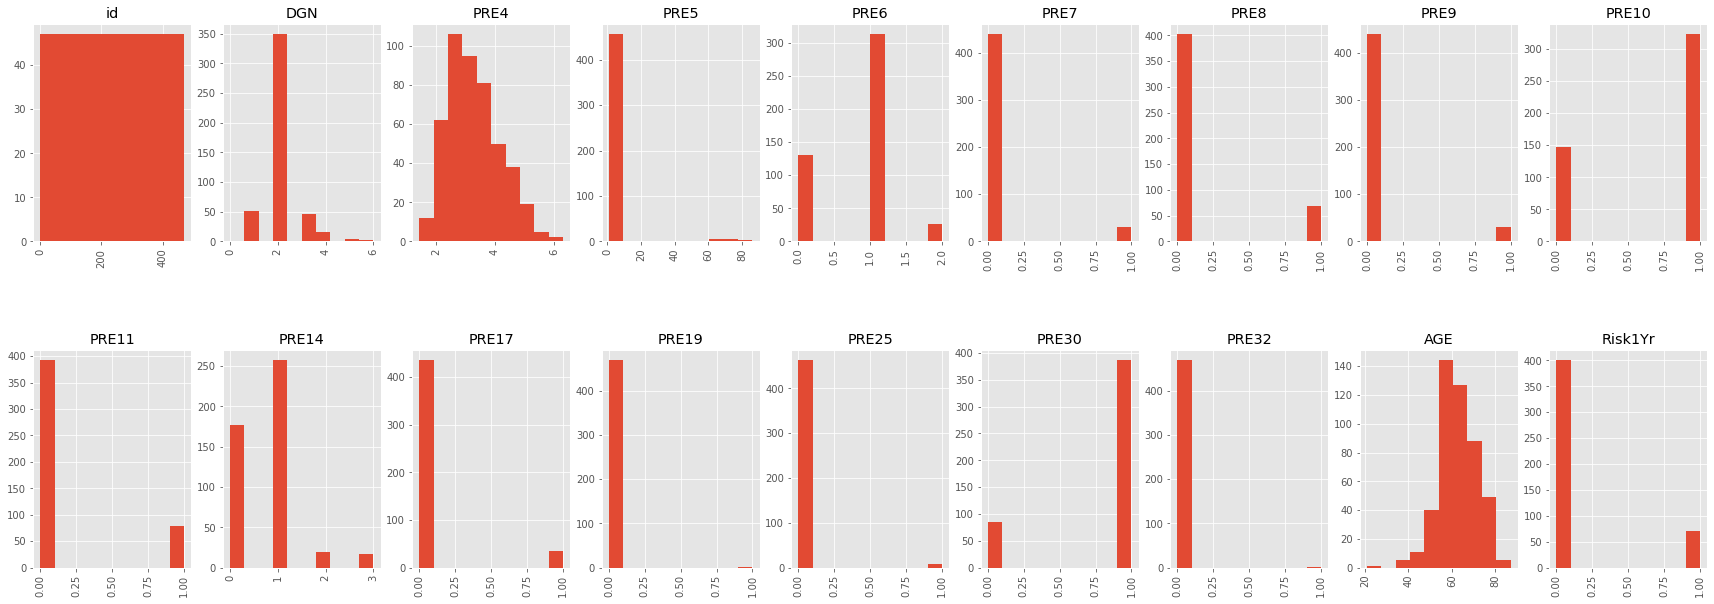

In [147]:
# строим распределение по всем данным из DataSet
ditstrib_features(df_encoded, 9)

Распределение величин типа Float не является нормальным

Исследуем данные в целевой функции на сбалансированность

2    349
1     52
3     47
4     15
5      4
6      2
0      1
Name: DGN, dtype: int64


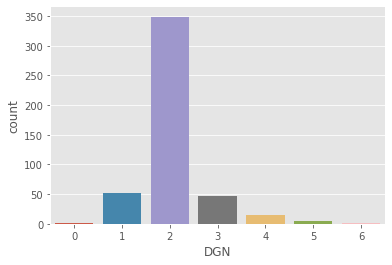

In [150]:
sns.countplot(x='DGN', data=df_encoded)
print(df_encoded['DGN'].value_counts())